In [23]:
import numpy as np
import matplotlib.pyplot as plt
h = 0.000000001
a = 2.0
b = 3.0
c = 4.0

result1 = a*b + c
print(result1)
b += h
result2 = a*b + c
print(result2)

print("Slope:", (result2-result1) / h)

10.0
10.000000002
Slope: 2.000000165480742


In [ ]:
import math
class Scalar:
    def __init__(self, data, _previous=(), prev_operation="", label=""):
        self.data = data
        self.gradient = 0.0
        self.backward = lambda: None
        self._previous = set(_previous)
        self.prev_operation = prev_operation
        self.label = label

    def __repr__(self):
        return f"Scalar(data={self.data})"

    def __add__(self, other):
        output = Scalar(self.data + other.data, (self, other), "+")
    
        def _backward():
            self.gradient += 1.0 * output.gradient
            other.grad += 1.0 * output.gradient

        output.backward = _backward
        return output

    def __mul__(self, other):
        output = Scalar(self.data * other.data, (self, other), "*")

        def _backward():
            self.gradient += other.data * output.gradient
            other.grad += self.data * output.gradient

        output.backward = _backward
        return output

    def exp(self):
        pass

    def tanh(self):
        t = ((math.exp(2*self.data) - 1) / (math.exp(2*self.data) + 1))
        output = Scalar(t, (self, ), "tanh")

        def _backward():
            self.gradient += (1-t**2) * output.gradient
        
        output.backward = _backward
        return output

    def backprop(self):
        graph = []
        visited = set()
        def computational_graph(scalar):
            if scalar not in visited:
                visited.add(scalar)
                for previous in scalar._previous:
                    computational_graph(previous)
                graph.append(scalar)
        computational_graph(self)

        self.gradient = 1.0
        for node in reversed(graph):
            node.backward()



In [143]:
from torch import Value
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(value):
        if value not in nodes:
            nodes.add(value)
            for child in value._previous:
                edges.add((child, value))
                build(child)
    build(root)

    return nodes, edges

def draw(root):
    dot = Digraph(format="svg", graph_attr={"rankdir": "LR"})

    nodes, edges = trace(root)

    for n in nodes:
        uid = str(id(n))

        dot.node(name=uid, label = "{ %s | data %.4f | grad %.4f}" % (n.label, n.data, n.grad), shape="record")
        if n.prev_operation:
            dot.node(name=uid + n.prev_operation, label=n.prev_operation)
            dot.edge(uid + n.prev_operation, uid)

    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2.prev_operation)

    return dot

In [144]:
import numpy as np
#Inputs
x1 = Scalar(2.0, label="x1")
x2 = Scalar(0.0, label="x2")

#Weights
w1 = Scalar(-3.0, label="w1")
w2 = Scalar(1.0, label="w2")

#Bias of neuron
b = Scalar(6.8813735870195432); label="b"

x1w1 = x1*w1; x1w1.label="x1w1"
x2w2 = x2*w2; x2w2.label="x2w2"

x1w1x2w2 = x1w1+x2w2; x1w1x2w2.label="x1w1x2w2"

n = x1w1x2w2 + b; n.label="n"

o = n.tanh(); o.label="o"


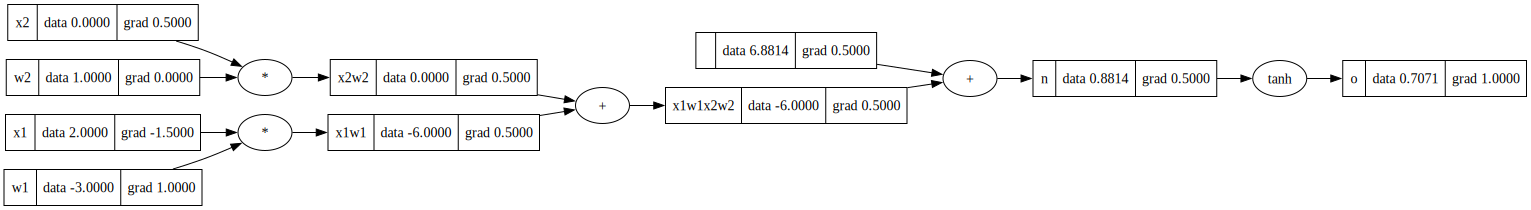

In [147]:
draw(o)

In [146]:
o.backprop()

In [151]:
h = 0.000001
a = 2
b = 4
c = 4
d = a+b
e = c*d
f = a+e

L1 = e

a = 2
b = 4
c = 4
d = a+b
e = c*d
f = a+e

L2 = e

print((L2-L1)/h)



0.0


In [152]:
h = 2

((a + h)/b) - (a/b)

0.5